In [1]:
import pandas as pd
from scipy import stats

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


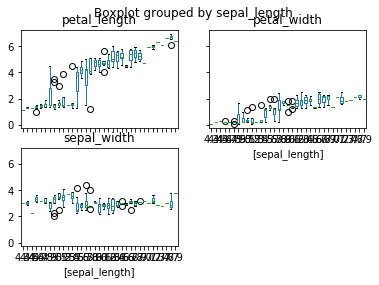

In [4]:
boxplot = iris.boxplot(by='sepal_length', grid=False)

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
modelo1 = ols('sepal_length ~ sepal_width', data=iris).fit()

In [15]:
res1 = sm.stats.anova_lm(modelo1)
res1

,df,sum_sq,mean_sq,F,PR(>F)
sepal_width,1.0,1.222100,1.222100,1.791754,0.182765
Residual,148.0,100.946233,0.682069,NaN,NaN


In [17]:
modelo2 = ols('sepal_length ~ sepal_width * petal_length', data=iris).fit()

In [18]:
res2 = sm.stats.anova_lm(modelo2)
res2

,df,sum_sq,mean_sq,F,PR(>F)
sepal_width,1.0,1.222100,1.222100,11.177200,1.052178e-03
petal_length,1.0,84.632899,84.632899,774.043697,3.131346e-60
sepal_width:petal_length,1.0,0.349890,0.349890,3.200055,7.570922e-02
Residual,146.0,15.963444,0.109339,NaN,NaN


In [19]:
from statsmodels.stats.multicomp import MultiComparison

In [21]:
mc = MultiComparison(iris['sepal_length'], iris['sepal_width'])

In [22]:
res_teste = mc.tukeyhsd()
print(res_teste)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 2.0    2.2    1.0667  -2.4273 4.5606 False 
 2.0    2.3    0.325    -3.058 3.708  False 
 2.0    2.4     0.3     -3.194 3.794  False 
 2.0    2.5    0.7625  -2.4469 3.9719 False 
 2.0    2.6     1.16   -2.1547 4.4747 False 
 2.0    2.7    0.8556   -2.334 4.0451 False 
 2.0    2.8    1.3357  -1.7963 4.4678 False 
 2.0    2.9     1.06   -2.1135 4.2335 False 
 2.0    3.0    1.0154  -2.0681 4.0989 False 
 2.0    3.1    0.9417  -2.2077 4.0911 False 
 2.0    3.2    0.8846  -2.2555 4.0247 False 
 2.0    3.3    1.0167  -2.2516 4.285  False 
 2.0    3.4    0.3167  -2.8327 3.4661 False 
 2.0    3.5     0.15   -3.1183 3.4183 False 
 2.0    3.6     0.6     -2.894 4.094  False 
 2.0    3.7    0.2667  -3.2273 3.7606 False 
 2.0    3.8     1.1    -2.1683 4.3683 False 
 2.0    3.9     0.4    -3.3059 4.1059 False 
 2.0    4.0     0.8    -3.4792 5.0792 False 
 2.0

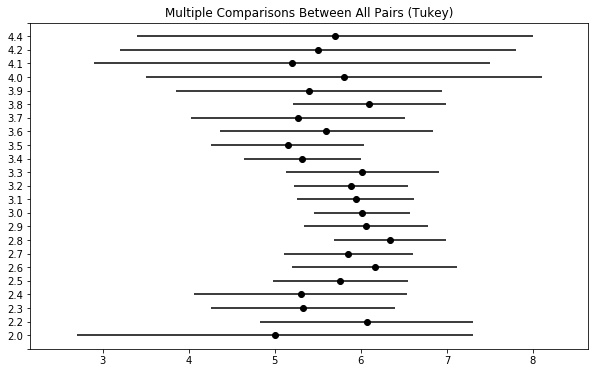

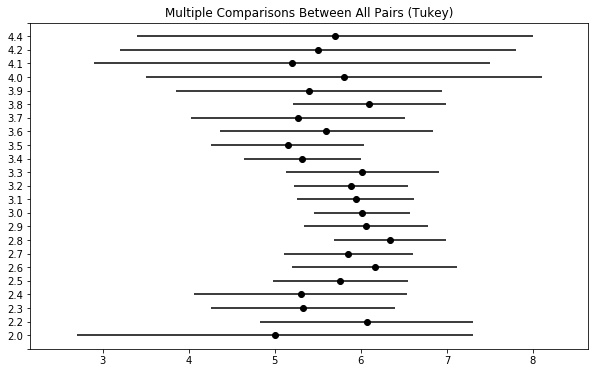

In [23]:
res_teste.plot_simultaneous()